# Filtrado de datos

En primer lugar, se importan las liberías necesarios para el preprocesado del conjunto de datos.

In [1]:
# se importan las librerías para un análisis previo y filtrado del conjunto de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Se importa el fichero de datos y se filtra por las columnas seleccionadas para el 

In [2]:
df = pd.read_csv('./pax_data_1868_agreements_09-11-20.csv')
df.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,1,1,0,0,0,1
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,0,0,0,1,0,0,0,0,1,1
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,1


Se comprueba la forma del conjunto de datos y los valores únicos de AgtId.

In [3]:
df.shape
len(df['AgtId'].unique())

1868

Se filtra por el conjunto de datos de interés.

In [4]:
# columnas de interés
columns = ['Con', 'Contp', 'Reg', 'Dat', 'Status', 'Agtp', 'Stage',
           'Loc1ISO', 'Loc2ISO', 'HrSec', 'SerProp', 'SerWork',
            'SerHeal', 'SerEdu', 'SerStdl', 'SerShel', 'SerSs', 
            'SerCult', 'SerOth', 'GeWom', 'GeMe', 'GeMeNu',
            'GeMeOth', 'GeLgbti', 'GeLgbtiNeg', 'GeFa', 'HrGen',
            'EqGen', 'AgtId']

In [5]:
df_filtered = df[columns]  # se genera el conjunto de datos filtrado
df_filtered.head()

,Con,Contp,Reg,Dat,Status,Agtp,Stage,Loc1ISO,Loc2ISO,HrSec,...,GeWom,GeMe,GeMeNu,GeMeOth,GeLgbti,GeLgbtiNeg,GeFa,HrGen,EqGen,AgtId
0,Afghanistan,Government/territory,Europe and Eurasia,2019-07-08,Multiparty signed/agreed,Intra,Pre,AFG,NaN,1,...,1,0,0,0,0,0,0,0,0,2232
1,Afghanistan,Government,Europe and Eurasia,2016-09-22,Multiparty signed/agreed,Intra,SubPar,AFG,NaN,0,...,1,0,0,0,0,0,0,0,1,1739
2,Afghanistan,Government,Europe and Eurasia,2014-09-21,Multiparty signed/agreed,Intra,Imp,AFG,NaN,0,...,1,0,0,0,0,0,0,1,0,1923
3,Afghanistan,Government,Europe and Eurasia,2012-07-08,Multiparty signed/agreed,InterIntra,Imp,AFG,NaN,0,...,1,1,1,0,0,0,0,1,1,864
4,Afghanistan,Government,Europe and Eurasia,2011-12-05,Multiparty signed/agreed,InterIntra,Pre,AFG,NaN,0,...,1,1,1,0,0,0,0,1,1,848


Para hacer la transformación de los países voy a utilizar la siguiente librería de python que hace la transcripción de los países en base a su loc ISO y los transcribe a su nombre actual oficial:
https://pypi.org/project/pycountry/


In [6]:
import pycountry

# se define una función que sustitye LOC code por el nombre del país
def get_official_country_name(loc_code):
    try:
        country = pycountry.countries.lookup(loc_code)
        return country.name
    except LookupError:
        return loc_code

# se generan las variables country name utilizando la función definida previamente
df_filtered['country_name_1'] = df_filtered['Loc1ISO'].apply(lambda x: get_official_country_name(x))
df_filtered['country_name_2'] = df_filtered['Loc2ISO'].apply(lambda x: get_official_country_name(x))

<ipython-input-6-b315f6644077>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['country_name_1'] = df_filtered['Loc1ISO'].apply(lambda x: get_official_country_name(x))
<ipython-input-6-b315f6644077>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['country_name_2'] = df_filtered['Loc2ISO'].apply(lambda x: get_official_country_name(x))


In [7]:
df_filtered.head()

,Con,Contp,Reg,Dat,Status,Agtp,Stage,Loc1ISO,Loc2ISO,HrSec,...,GeMeNu,GeMeOth,GeLgbti,GeLgbtiNeg,GeFa,HrGen,EqGen,AgtId,country_name_1,country_name_2
0,Afghanistan,Government/territory,Europe and Eurasia,2019-07-08,Multiparty signed/agreed,Intra,Pre,AFG,NaN,1,...,0,0,0,0,0,0,0,2232,Afghanistan,NaN
1,Afghanistan,Government,Europe and Eurasia,2016-09-22,Multiparty signed/agreed,Intra,SubPar,AFG,NaN,0,...,0,0,0,0,0,0,1,1739,Afghanistan,NaN
2,Afghanistan,Government,Europe and Eurasia,2014-09-21,Multiparty signed/agreed,Intra,Imp,AFG,NaN,0,...,0,0,0,0,0,1,0,1923,Afghanistan,NaN
3,Afghanistan,Government,Europe and Eurasia,2012-07-08,Multiparty signed/agreed,InterIntra,Imp,AFG,NaN,0,...,1,0,0,0,0,1,1,864,Afghanistan,NaN
4,Afghanistan,Government,Europe and Eurasia,2011-12-05,Multiparty signed/agreed,InterIntra,Pre,AFG,NaN,0,...,1,0,0,0,0,1,1,848,Afghanistan,NaN


El atributo Con a veces contiene más de un país. Por lo tanto, se generan tantas filas como países origen del conflicto.

In [8]:
df_result = []
for row in df_filtered.to_dict(orient='records'):  # se itera el dataframe
    cons_values = row.get('Con').split('/')  # se separa la variable Con con el elemento /
    if cons_values:
        # en el caso que la variable haya sido separada se genera un registro con cada 
        # uno de los valores obtenidos en la separación
        for con in cons_values:
            if con:
                tmp_dict = row.copy()
                tmp_dict['Con'] = con
                df_result.append(tmp_dict)
    else:  # en caso contrario, se guarda el registro
        df_result.append(row)

# se genera un conjunto de datos con el resultado
df_result = pd.DataFrame(df_result)

# Se reparan aquellas filas con datos incorrectos.
df_result['Con'] = df_result['Con'].str.replace('\(former\)', '')
df_result['Con'] = df_result['Con'].str.replace('\(', '')
df_result['Con'] = df_result['Con'].str.replace('\)', '')

# not print so far
len(df_result['AgtId'].unique())

1868

Es posible que algunos de los países obtenidos debido a la escritura no puedan ser leído. Por lo tanto, se reparan utilizando la librería de python pycountry.

In [15]:
# se genera una función para reparar el valor de la variable Con
def country_reparator(country_name):
    """
    Dado el nombre de un país, devuelve el nombre del país si este se encuentra en la librería
    pycountry. En caso contrario, devuelve np.nan.
    """
    try:
        pycountry.countries.lookup(country_name)
        return country_name
    except LookupError:
        return np.nan

# se repara la variable Con mediante la función definnida anteriormente
df_result['Con'] = df_result['Con'].apply(lambda x: country_reparator(x))

# Finalmente, se genera un nuevo dataframe done de rellenan los valores nan con el valor de las variable country_name_1
# o country_name_2 si esta primera era nan.
df_result_2 = []
for row in df_result.to_dict(orient='records'):
    if row['Con'] != row['Con']:  # manage numpy nan values
        row['Con'] = row['country_name_1'] if not row['country_name_1'] != row['country_name_1'] else row['country_name_2']
            
    df_result_2.append(row)

df_result = pd.DataFrame(df_result_2)

df_result.drop_duplicates(subset=['Con', 'AgtId'], inplace=True)

del df_result_2

len(df_result['AgtId'].unique())

1868

Se va a comprobar si los acuerdos pueden contener al mimso tiempo cualquiera de los atributos derechos socioeconómicos, género, derechos humanos o igualdad.

In [16]:
df_result[df_result['Con'].isnull()]

,Con,Contp,Reg,Dat,Status,Agtp,Stage,Loc1ISO,Loc2ISO,HrSec,...,GeMeNu,GeMeOth,GeLgbti,GeLgbtiNeg,GeFa,HrGen,EqGen,AgtId,country_name_1,country_name_2
48,NaN,Government,Africa (excl MENA),2006-12-15,Multiparty signed/agreed,InterIntra,Imp,NaN,NaN,0,...,0,0,0,0,0,1,3,668,NaN,NaN
60,NaN,Government,Africa (excl MENA),2004-11-20,Multiparty signed/agreed,InterIntra,SubPar,NaN,NaN,0,...,0,0,0,0,0,1,1,349,NaN,NaN
72,NaN,Government,Africa (excl MENA),2013-02-24,Multiparty signed/agreed,InterIntra,Imp,NaN,NaN,0,...,0,0,0,0,0,1,0,789,NaN,NaN
85,NaN,Government,Africa (excl MENA),2006-11-30,Multiparty signed/agreed,InterIntra,SubPar,NaN,NaN,0,...,0,0,0,0,0,1,1,1062,NaN,NaN
577,NaN,Territory,Cross-regional,1999-05-05,Multiparty signed/agreed,Inter,SubPar,NaN,NaN,0,...,0,0,0,0,0,0,0,1811,NaN,NaN
580,NaN,Territory,Cross-regional,1996-06-24,Multiparty signed/agreed,Inter,SubPar,NaN,NaN,0,...,0,0,0,0,0,0,0,1807,NaN,NaN
583,NaN,Territory,Cross-regional,1996-06-24,Multiparty signed/agreed,Inter,SubPar,NaN,NaN,0,...,0,0,0,0,0,0,0,1808,NaN,NaN
586,NaN,Territory,Cross-regional,1994-01-27,Multiparty signed/agreed,Inter,SubPar,NaN,NaN,0,...,0,0,0,0,0,0,0,1809,NaN,NaN
1008,NaN,Territory,Cross-regional,1990-09-12,Multiparty signed/agreed,Inter,SubComp,NaN,NaN,0,...,0,0,0,0,0,0,1,1887,NaN,NaN
1521,NaN,Government/territory,Europe and Eurasia,2016-11-30,Multiparty signed/agreed,Intra,Imp,NaN,NaN,0,...,0,0,0,0,0,0,0,2032,NaN,NaN


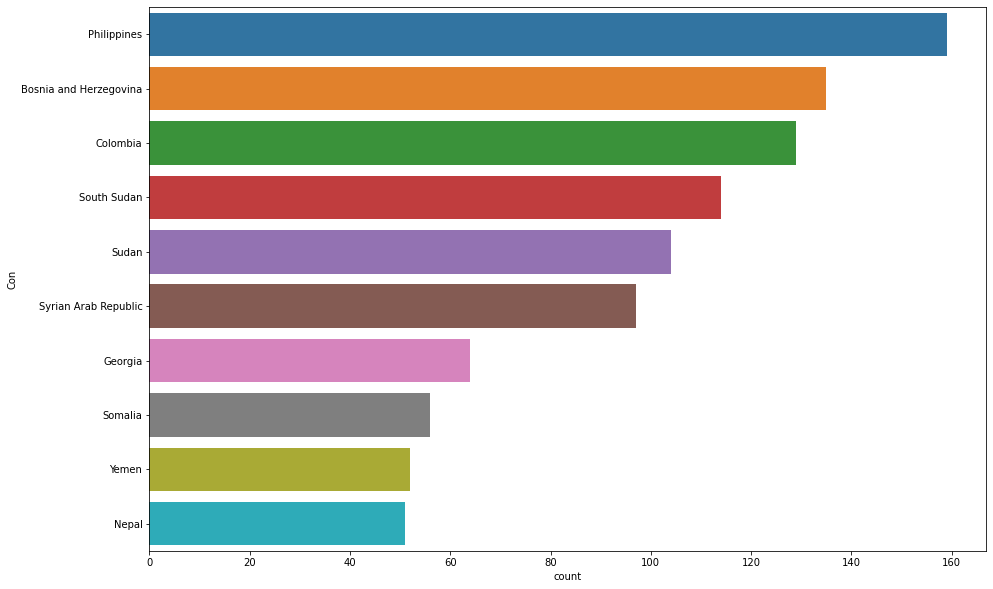

In [17]:
# se guarda en una varaible los 10 países donde se han generado más conflictos
top_10_conflicts_countries = df_result['Con'].value_counts(sort=True).iloc[:10].index

fig = plt.figure(figsize=(15, 10))

# se muestran los 10 países donde se generan más conflictos mediante un diagrama de barras
ax = sns.countplot(y=df_result['Con'].loc[df_result['Con'].isin(top_10_conflicts_countries)],
                 order=df_result['Con'].value_counts().index[:10], orient='h')

plt.show()

Finalmente, se escribe fichero final.

In [11]:
# let's write the output file
df_result.to_csv('./pax_data_1868_agreements_09-11-20_filtered.csv', index=False)